In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [56]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
print(df.head())
df.tail()

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# scaling to level the features


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [58]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# FEATURE SELECTION

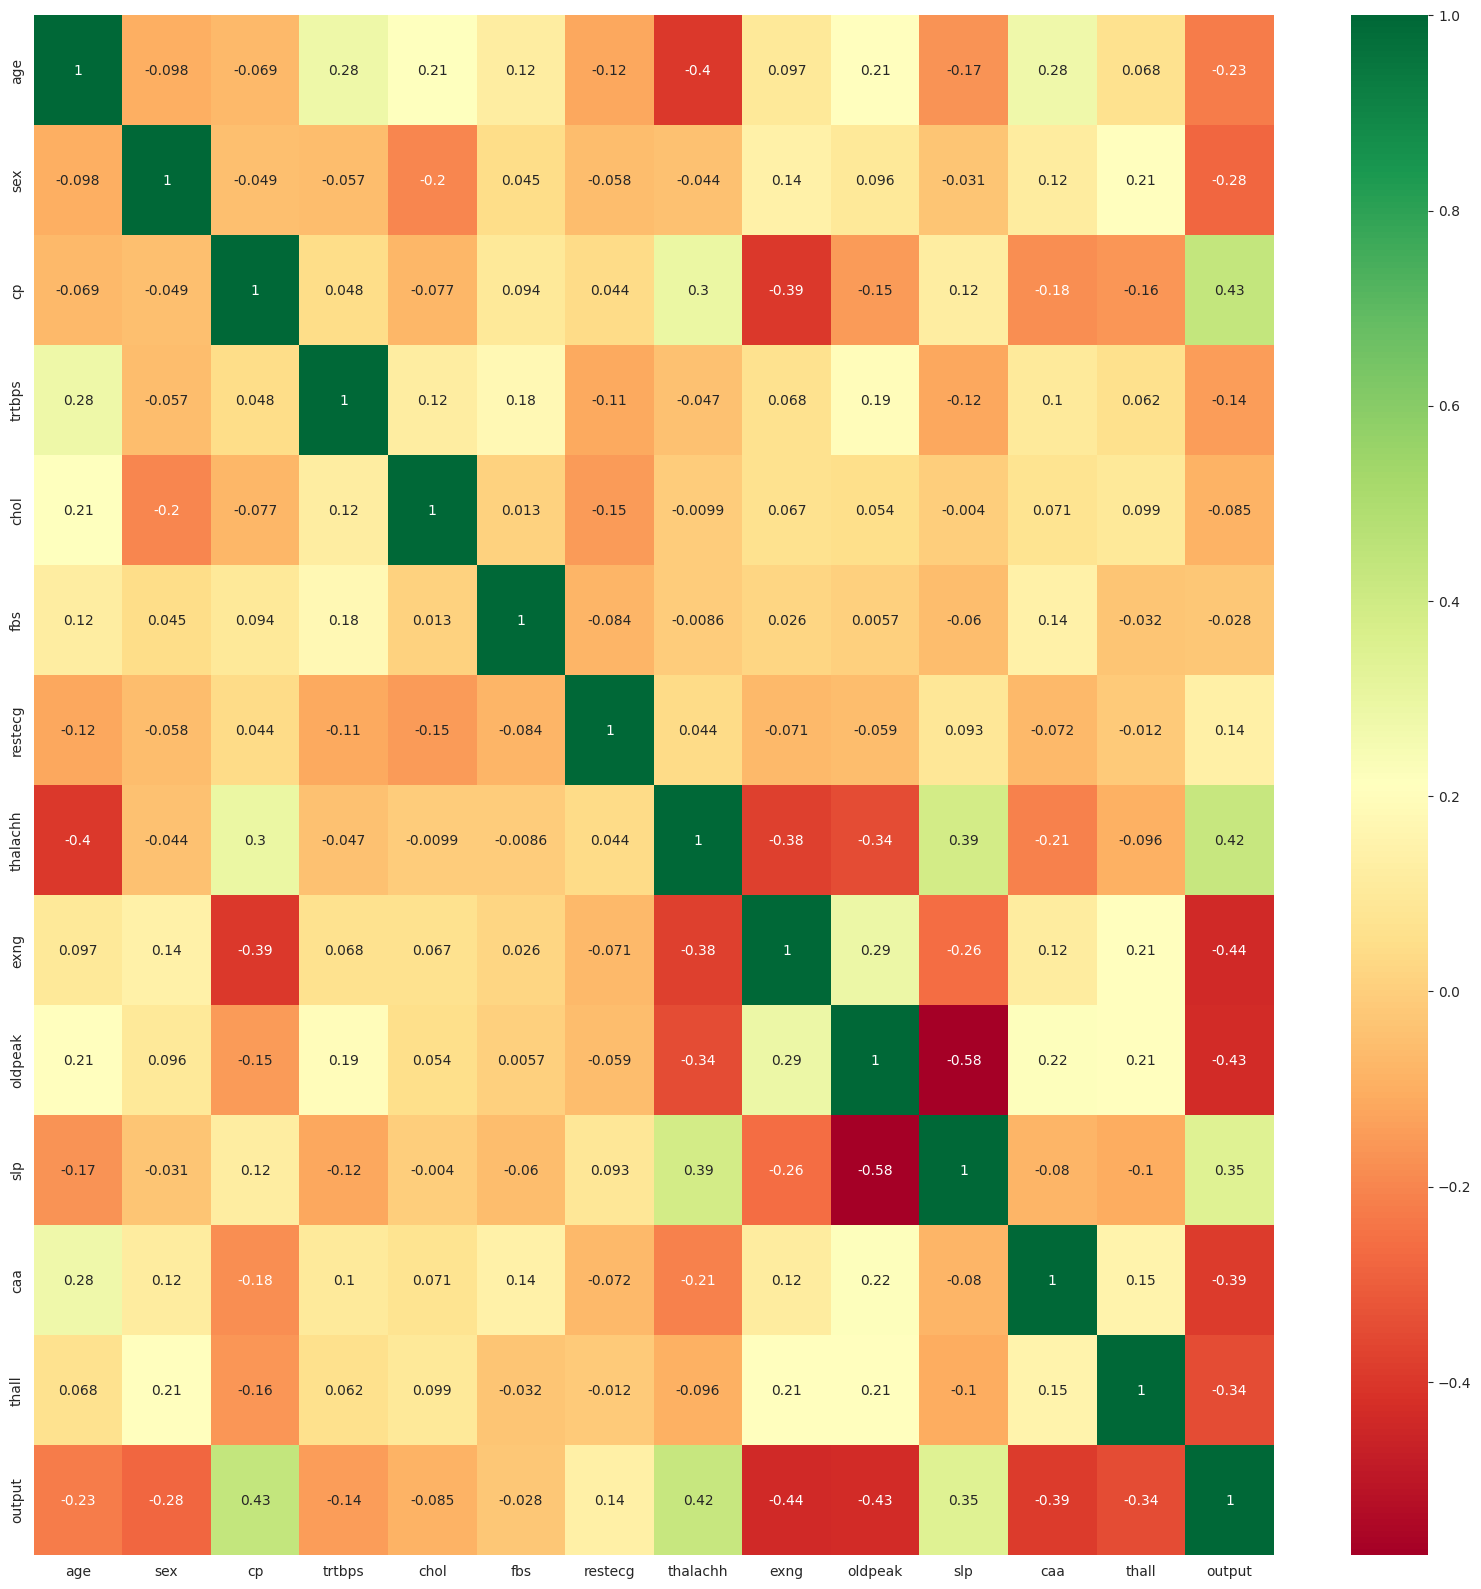

In [59]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

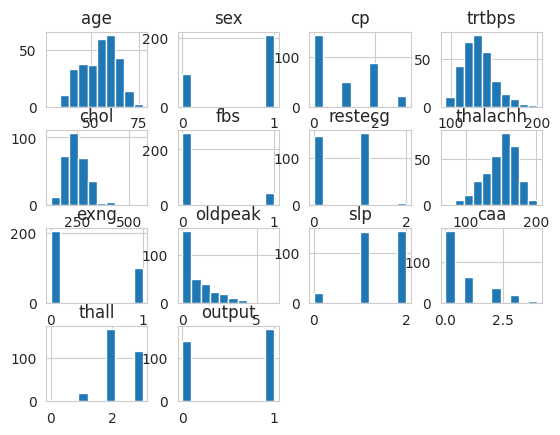

In [60]:
df.hist()

<Axes: xlabel='output', ylabel='count'>

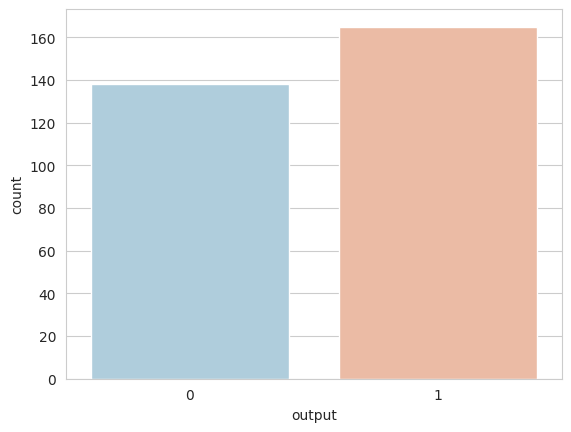

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r')

# Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [62]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
dataset = dataset.astype(int) 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [64]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.154475,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.089785,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.219165,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.716145,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.716145,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [65]:
y = dataset['output']
X = dataset.drop(['output'], axis = 1)

# Linear Regression

In [66]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [67]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [70]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [71]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-3.753071403886889e+24

In [72]:
##prediction 
reg_pred=regression.predict(X_test)
reg_pred

array([-0.03200483,  0.54643012,  0.55570746, -0.16926813,  0.86778307,
        1.03245593,  0.50096179, -0.25862359, -0.09938001,  0.47666979,
        0.56772662,  0.43314887,  0.95665026,  0.07084418,  1.08274889,
        0.94151354,  1.04197741,  0.03031683, -0.28560113,  0.04747057,
        0.57389594,  0.15836859,  0.57981921,  0.67662097,  0.61778307,
        0.52409125,  0.92808581,  0.61888171, -0.05714654,  0.86985827,
       -0.08174371,  0.02580023, -0.21394586,  0.35704089,  0.92955065,
        0.02384711,  0.80613757,  0.66844225,  0.61027289,  0.76475573,
        1.0438695 ,  0.82872057,  0.95640612,  0.71373034,  0.69193793,
        0.19273139,  0.50765276,  1.03855944,  0.02024127, -0.17476129,
       -0.03682184, -0.22780084,  0.61411334,  0.87315417,  0.12186957,
       -0.03187799,  0.19492865,  1.03038073,  0.00346137, -0.28608942,
        0.21464301,  0.90660143,  0.29227973,  0.72337389,  0.80552722,
        0.09013129,  0.55406237,  0.58030749,  0.78514147,  1.04

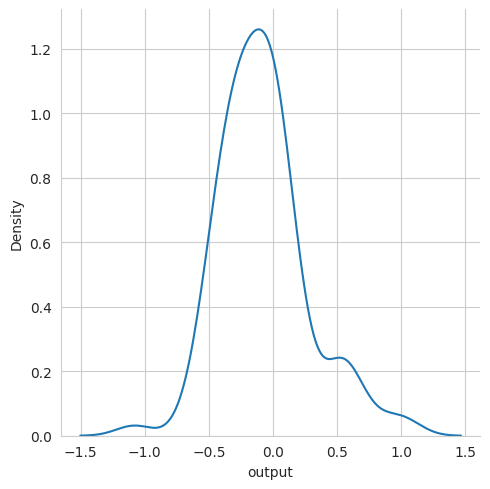

In [73]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [74]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.21416719625311698

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

# RandomSearchCV for hyperparameter tunning

In [76]:
from sklearn.model_selection import RandomizedSearchCV
parameter={
  'penalty':['l1', 'l2', 'elasticnet', None],
   'C': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
   'random_state':[int(x) for x in np.linspace(start=2,stop=50,num=2)],

}
print(parameter)

{'penalty': ['l1', 'l2', 'elasticnet', None], 'C': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'random_state': [2, 50]}


In [77]:

lr_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=parameter,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [200, 400, 600, 800, 1000, 1200,
                                              1400, 1600, 1800, 2000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'random_state': [2, 50]},
                   random_state=100, verbose=2)

# GridSearchCV for hyperparameter tunning

In [78]:
from sklearn.model_selection import GridSearchCV
gridparam=lr_randomcv.best_params_

In [84]:
lr_randomcv.best_params_

{'random_state': 2, 'penalty': 'l2', 'C': 200}

In [87]:
searchparam={
  'random_state': [2],
    'penalty':['l2'],
    'C': [200]  
}

In [88]:
classifier_regressor=GridSearchCV(classifier,param_grid=searchparam,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [200], 'penalty': ['l2'], 'random_state': [2]},
             scoring='accuracy')

In [89]:
print(classifier_regressor.best_params_)
##prediction
y_pred=classifier_regressor.predict(X_test)

{'C': 200, 'penalty': 'l2', 'random_state': 2}


In [90]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.8241758241758241


In [91]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

